In [1]:
import os
import numpy as np
import pandas as pd
from functools import lru_cache


In [2]:
train_data_dir = '../raw_data/'
test_data_dir = '../raw_data/'
task = 'task1'
PREDS_PER_SESSION = 100

In [3]:
# Cache loading of data for multiple calls

@lru_cache(maxsize=1)
def read_product_data():
    print(os.getcwd())
    print(os.path.join(train_data_dir, 'products_train.csv'))
    return pd.read_csv(os.path.join(train_data_dir, 'products_train.csv'))

@lru_cache(maxsize=1)
def read_train_data():
    return pd.read_csv(os.path.join(train_data_dir, 'sessions_train.csv'))

@lru_cache(maxsize=3)
def read_test_data(task):
    return pd.read_csv(os.path.join(test_data_dir, f'sessions_test_{task}.csv'))

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def read_locale_data(locale, task):
    products = read_product_data().query(f'locale == "{locale}"')
    sess_train = read_train_data().query(f'locale == "{locale}"')
    sess_test = read_test_data(task).query(f'locale == "{locale}"')
    return products, sess_train, sess_test

def get_token_len(sess):
    token_list = sess.strip('[]').split(' ')
    return len(token_list)

def show_locale_info(locale, task):
    products, sess_train, sess_test = read_locale_data(locale, task)

    train_l = sess_train['prev_items'].apply(lambda sess: get_token_len(sess))
    test_l = sess_test['prev_items'].apply(lambda sess: get_token_len(sess))

    # plot hist for the length of sessions 
    fig = plt.figure(figsize=(25, 8))
    G = gridspec.GridSpec(1, 2)
    
    train_num_hist = int(train_l.max() - 1) // 10 + 1
    axes =fig.add_subplot(G[0, 0])
    axes.hist(train_l, bins=train_num_hist)

    test_num_hist = int(train_l.max() - 1) // 10 + 1
    axes =fig.add_subplot(G[0, 1])
    axes.hist(test_l, bins=test_num_hist)
    plt.show()

    # train_l_hist = train_l.hist(bins=train_num_hist)
    # test_num_hist = int(test_l.max() - 1) // 20 + 1
    # test_l_hist = test_l.hist(bins=test_num_hist)

    print(f"Locale: {locale} \n"
          f"Number of products: {products['id'].nunique()} \n"
          f"Number of train sessions: {len(sess_train)} \n"
          f"Train session lengths - "
          f"Mean: {train_l.mean():.2f} | Median {train_l.median():.2f} | "
          f"Min: {train_l.min():.2f} | Max {train_l.max():.2f} \n"
          f"Number of test sessions: {len(sess_test)}"
        )
    if len(sess_test) > 0:
        print(
             f"Test session lengths - "
            f"Mean: {test_l.mean():.2f} | Median {test_l.median():.2f} | "
            f"Min: {test_l.min():.2f} | Max {test_l.max():.2f} \n"
        )
    print("======================================================================== \n")

/root/autodl-tmp/xiaolong/WorkSpace/Amazon-KDDCUP-23/data_preprocess
../raw_data/products_train.csv


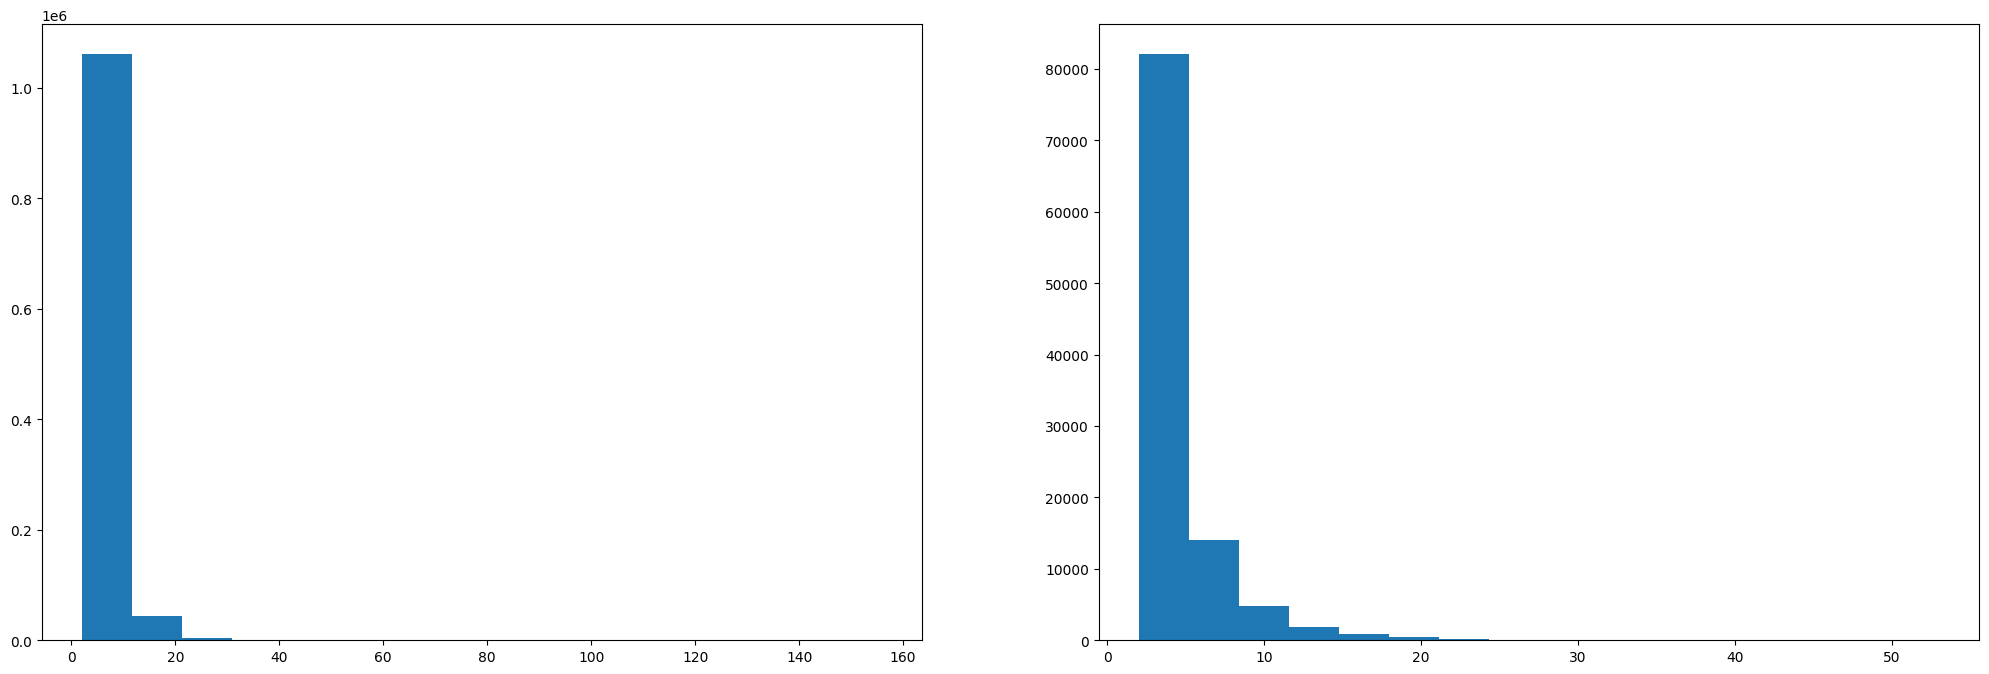

Locale: DE 
Number of products: 518327 
Number of train sessions: 1111416 
Train session lengths - Mean: 4.35 | Median 3.00 | Min: 2.00 | Max 156.00 
Number of test sessions: 104568
Test session lengths - Mean: 4.30 | Median 3.00 | Min: 2.00 | Max 53.00 




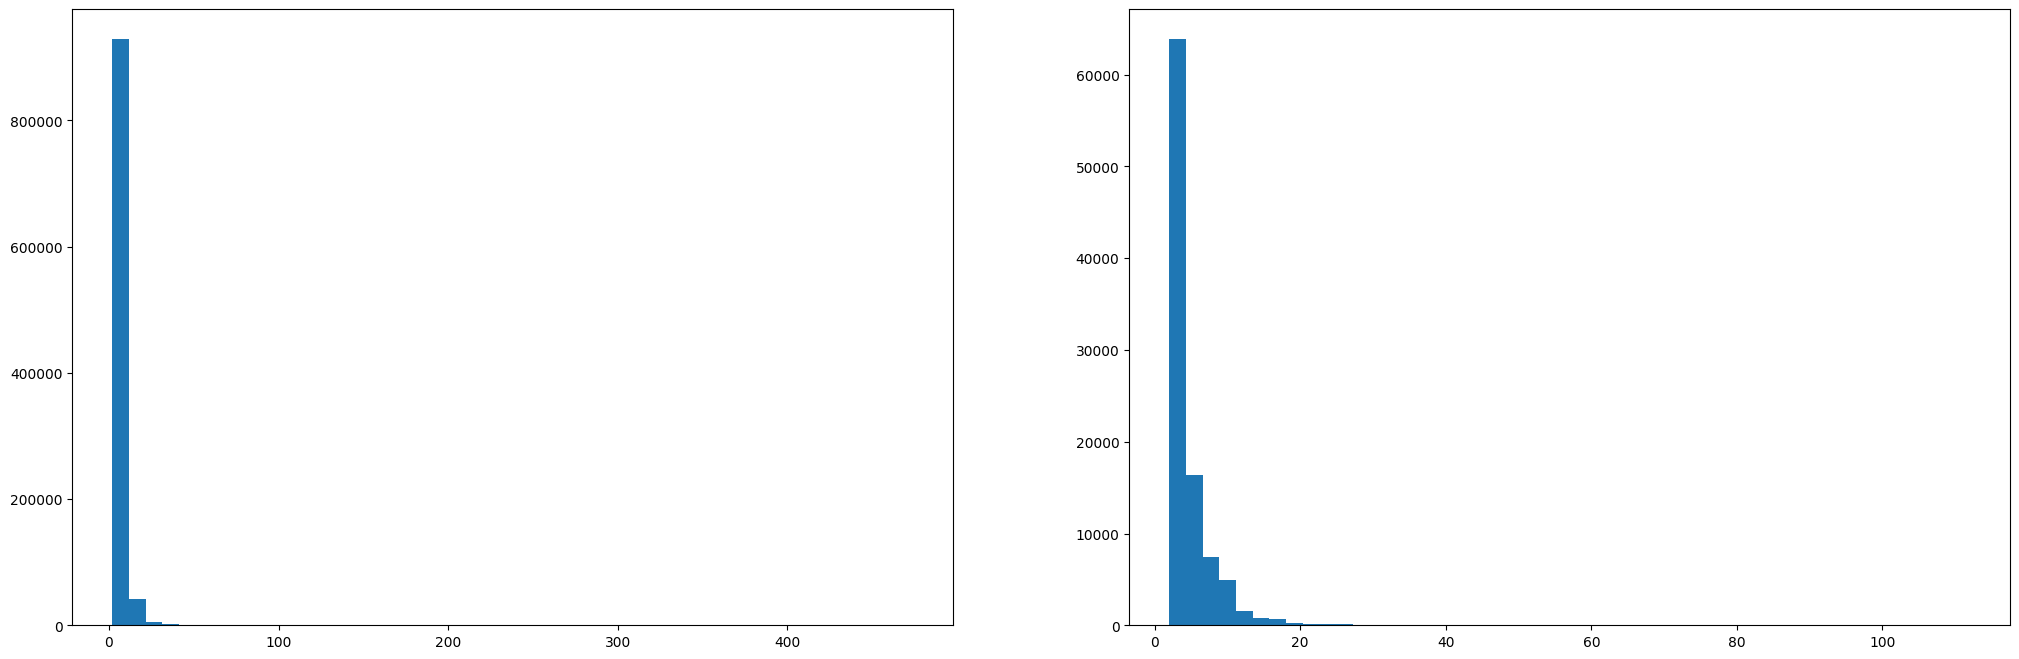

Locale: JP 
Number of products: 395009 
Number of train sessions: 979119 
Train session lengths - Mean: 4.48 | Median 3.00 | Min: 2.00 | Max 474.00 
Number of test sessions: 96467
Test session lengths - Mean: 4.51 | Median 3.00 | Min: 2.00 | Max 112.00 




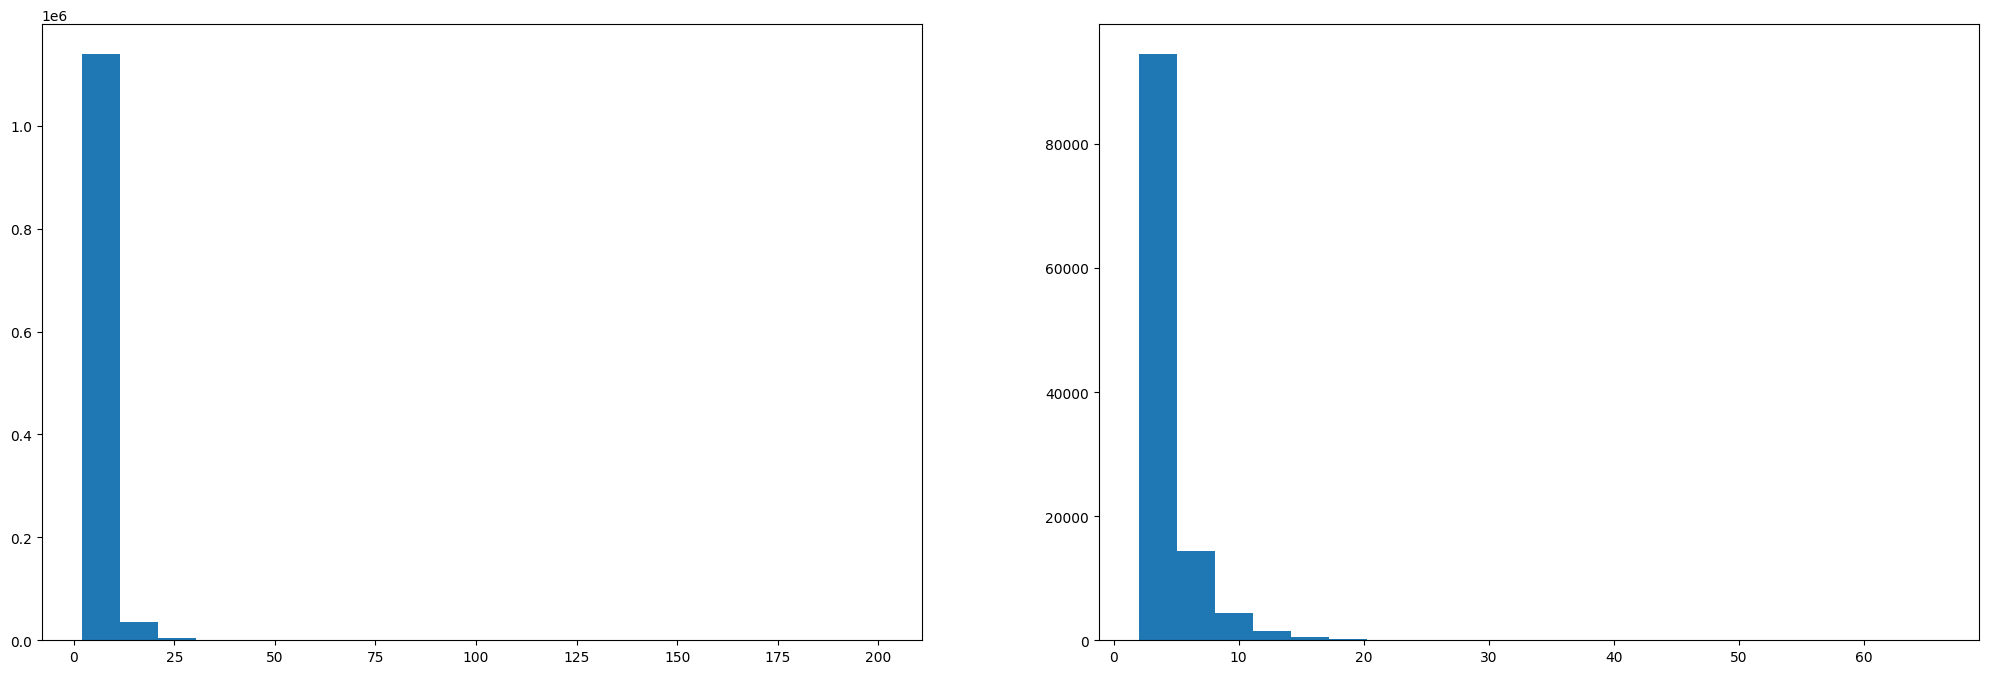

Locale: UK 
Number of products: 500180 
Number of train sessions: 1182181 
Train session lengths - Mean: 4.12 | Median 3.00 | Min: 2.00 | Max 201.00 
Number of test sessions: 115936
Test session lengths - Mean: 4.02 | Median 3.00 | Min: 2.00 | Max 66.00 




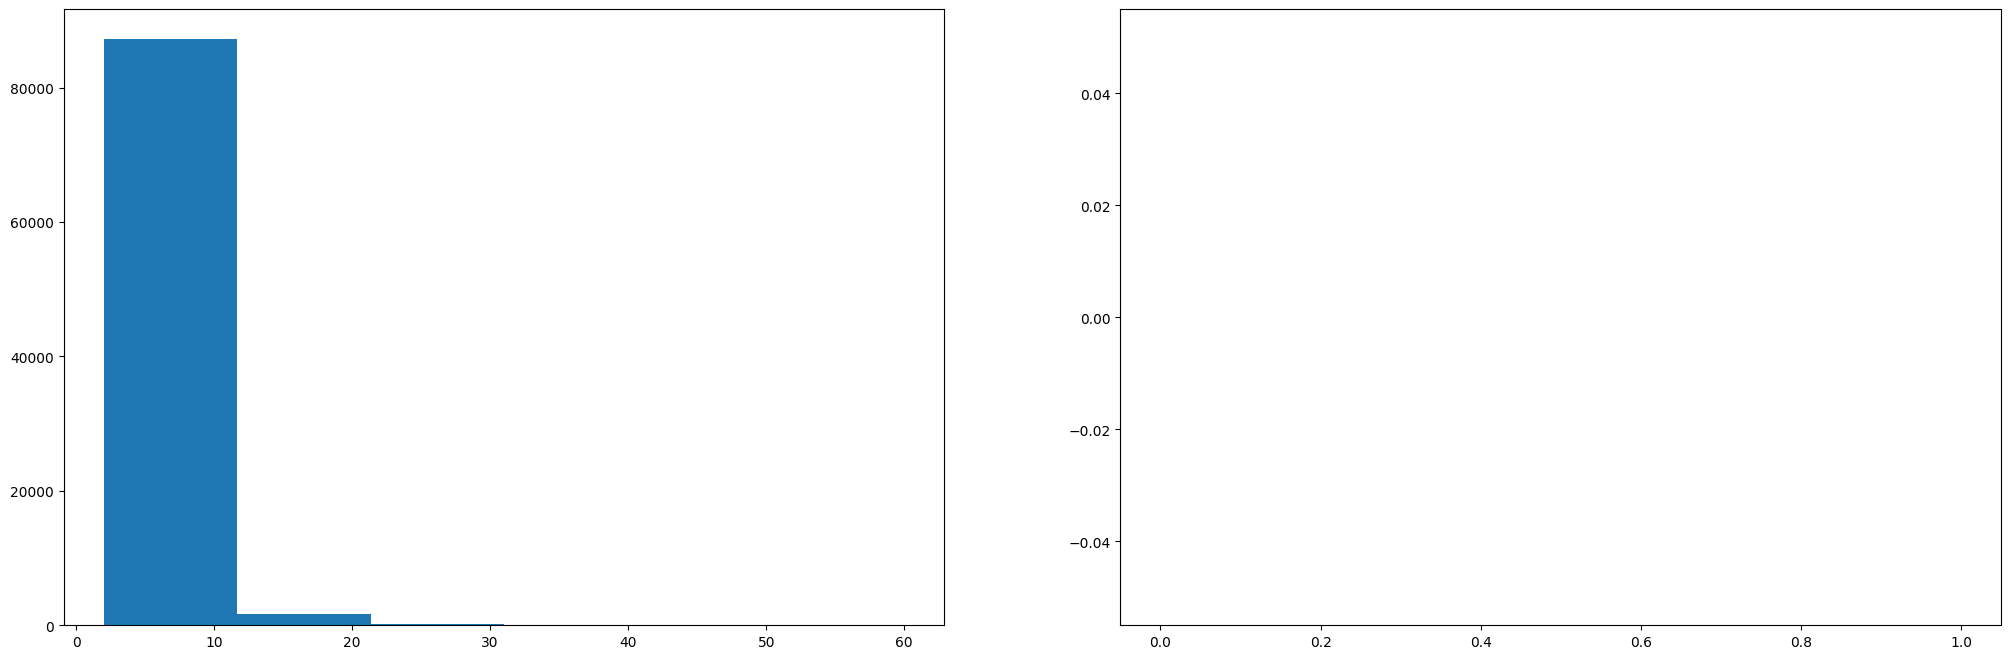

Locale: ES 
Number of products: 42503 
Number of train sessions: 89047 
Train session lengths - Mean: 3.66 | Median 3.00 | Min: 2.00 | Max 60.00 
Number of test sessions: 0



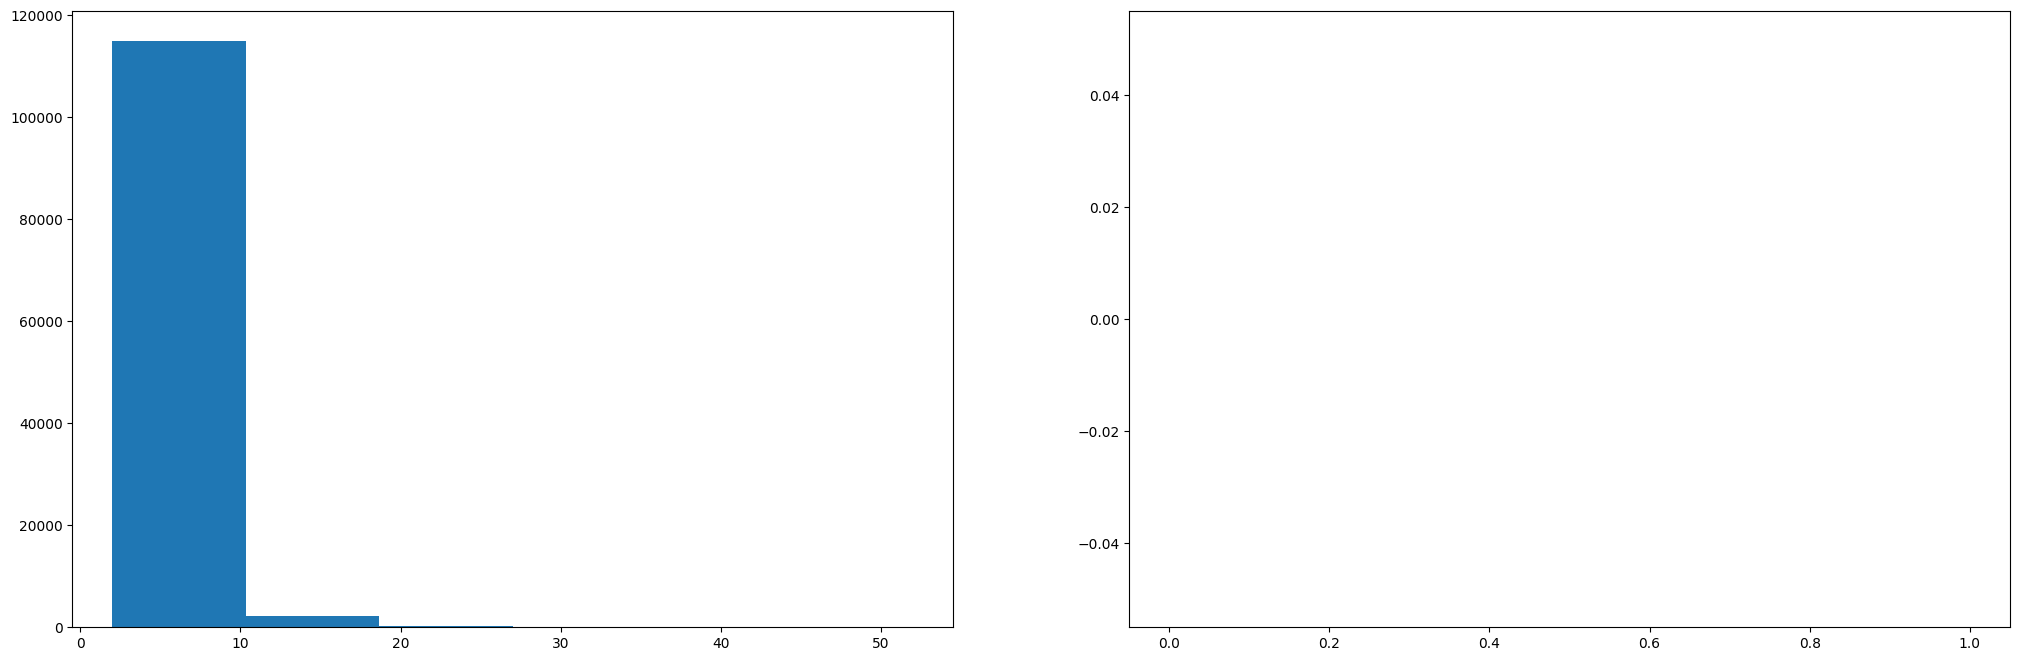

Locale: FR 
Number of products: 44577 
Number of train sessions: 117561 
Train session lengths - Mean: 3.55 | Median 3.00 | Min: 2.00 | Max 52.00 
Number of test sessions: 0



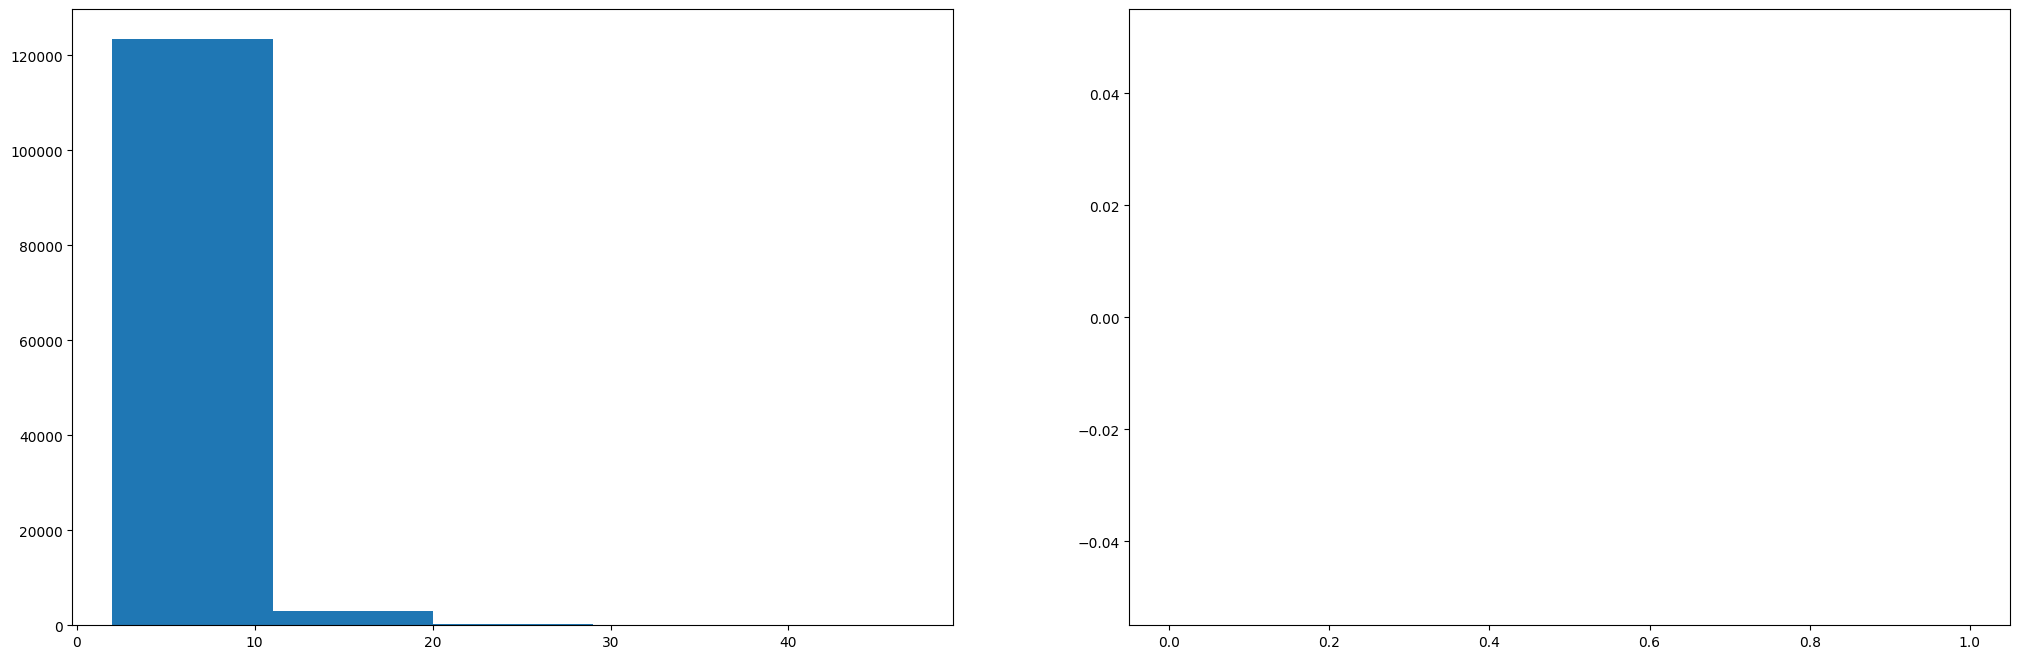

Locale: IT 
Number of products: 50461 
Number of train sessions: 126925 
Train session lengths - Mean: 3.66 | Median 3.00 | Min: 2.00 | Max 47.00 
Number of test sessions: 0



In [5]:
products = read_product_data()
locale_names = products['locale'].unique()
# show_locale_info(locale_names[0], task)
for locale in locale_names:
    show_locale_info(locale, task)

In [6]:
products.sample(5)

,id,locale,title,price,brand,color,size,model,material,author,desc
684863,B09RQMTGKC,JP,ファンケル (FANCL) (新) 大人のカロリミット 28回分 (14回分×2袋) [機能...,2620.00,FANCL,NaN,84粒(x 1),5889X2,NaN,NaN,【1回の目安】 3粒（1日1～3回） 【機能性関与成分／1回3粒当たり】 桑の葉イミノシュガ...
651248,B0B1J3ZSMZ,JP,DANNI＆TONI ジェルネイルシール 硬化タイプ 手用 長持ち無臭 防水 SGS認定 安...,1580.00,DANNI＆TONI,26. No man's land of Rose,NaN,NaN,NaN,NaN,【28pcsどんな形の爪にもピッタリのネイルシール】 ほとんどのネイルの形状とサイズにフィッ...
1135742,B07STGDP96,UK,How to Draw: Easy Techniques and Step-by-Step ...,6.05,Rockridge Press,NaN,NaN,NaN,NaN,"Baid, Aaria",NaN
330943,B09776PMSY,DE,"deleyCON 3,0m Kabelschlauch Selbstschließend K...",13.79,deleyCON,Weiß,3 M,MK4764,Nylon,NaN,Für ein optimales Kabelmanagement // Selbstsch...
789,B089KC34BV,DE,"Geschenke für Männer, BIBURY Mini Cuttermesser...",5.99,BIBURY,Auto Model,NaN,NaN,NaN,NaN,🎁 5 Ersatzklingen - Im Lieferumfang des Produk...


In [13]:
from tqdm import tqdm 
def read_locale_products(locale):
    products = read_product_data().query(f'locale == "{locale}"')
    return products

def show_locale_product_info(locale, tokenizer):
    products = read_locale_products(locale)
    if len(products) > 100000:
        products = products.sample(100000)
    product_titles = products['title']
    product_descs = products['desc']
    
    title_lens = []
    desc_lens = []
    for i in tqdm(range(len(products))):
        try:
            if not pd.isna(product_titles.iloc[i]):
                title_len = tokenizer(product_titles.iloc[i], return_length=True)['length']
                if isinstance(title_len, list):
                    title_len = title_len[0]
            else:
                title_len = 0
            if not pd.isna(product_descs.iloc[i]):
                desc_len = tokenizer(product_descs.iloc[i], return_length=True)['length']
                if isinstance(desc_len, list):
                    desc_len = desc_len[0]
            else:
                desc_len = 0
            title_lens.append(title_len)
            desc_lens.append(desc_len)
        except Exception as error:
            print(f"error index : {i}")
            raise error

    title_lens = pd.Series(title_lens, dtype=np.float32)
    desc_lens = pd.Series(desc_lens, dtype=np.float32)

    # plot hist for the length of titles and descs 
    fig = plt.figure(figsize=(25, 8))
    G = gridspec.GridSpec(1, 2)
    
    title_length_hist = int(title_lens.max() - 1) // 5 + 1
    axes =fig.add_subplot(G[0, 0])
    axes.hist(title_lens, bins=title_length_hist)

    desc_length_hist = int(desc_lens.max() - 1) // 5 + 1
    axes =fig.add_subplot(G[0, 1])
    axes.hist(desc_lens, bins=desc_length_hist)
    plt.show()

    print(f"Locale: {locale} \n"
            f"Number of products: {products['id'].nunique()} \n"
            f"Product title lengths - "
            f"Mean: {title_lens.mean():.2f} | Median {title_lens.median():.2f} | "
            f"Min: {title_lens.min():.2f} | Max {title_lens.max():.2f} \n"
            f"Product description lengths - "
            f"Mean: {desc_lens.mean():.2f} | Median {desc_lens.median():.2f} | "
            f"Min: {desc_lens.min():.2f} | Max {desc_lens.max():.2f} \n"
            )
    print("cxllll")


100%|██████████| 100000/100000 [01:18<00:00, 1275.86it/s]


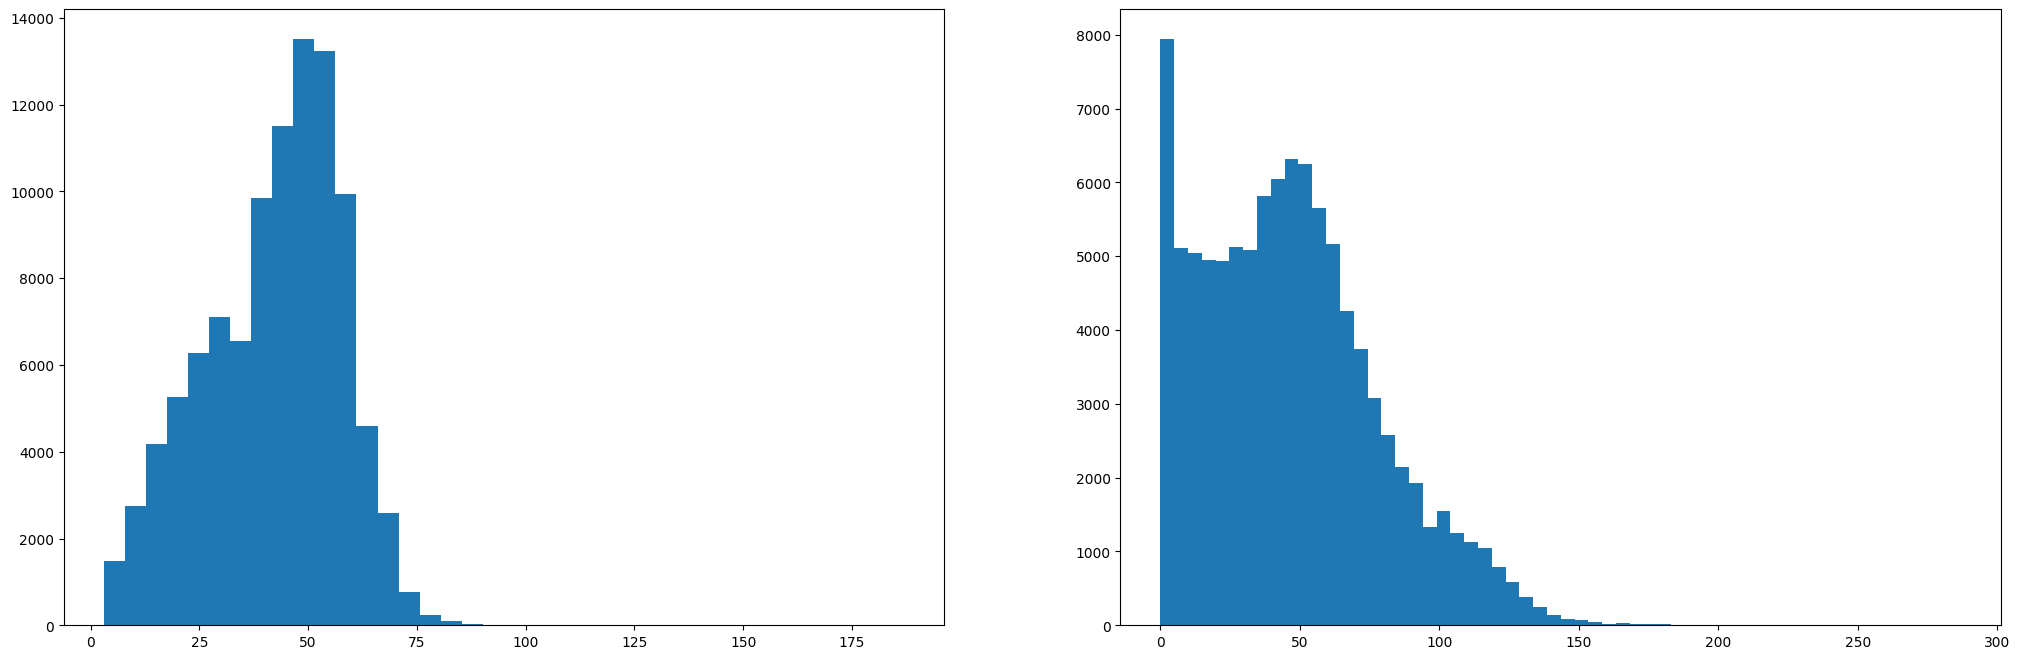

Locale: DE 
Number of products: 100000 
Product title lengths - Mean: 42.09 | Median 44.00 | Min: 3.00 | Max 187.00 
Product description lengths - Mean: 46.88 | Median 44.00 | Min: 0.00 | Max 287.00 

cxllll


100%|██████████| 100000/100000 [01:01<00:00, 1613.74it/s]


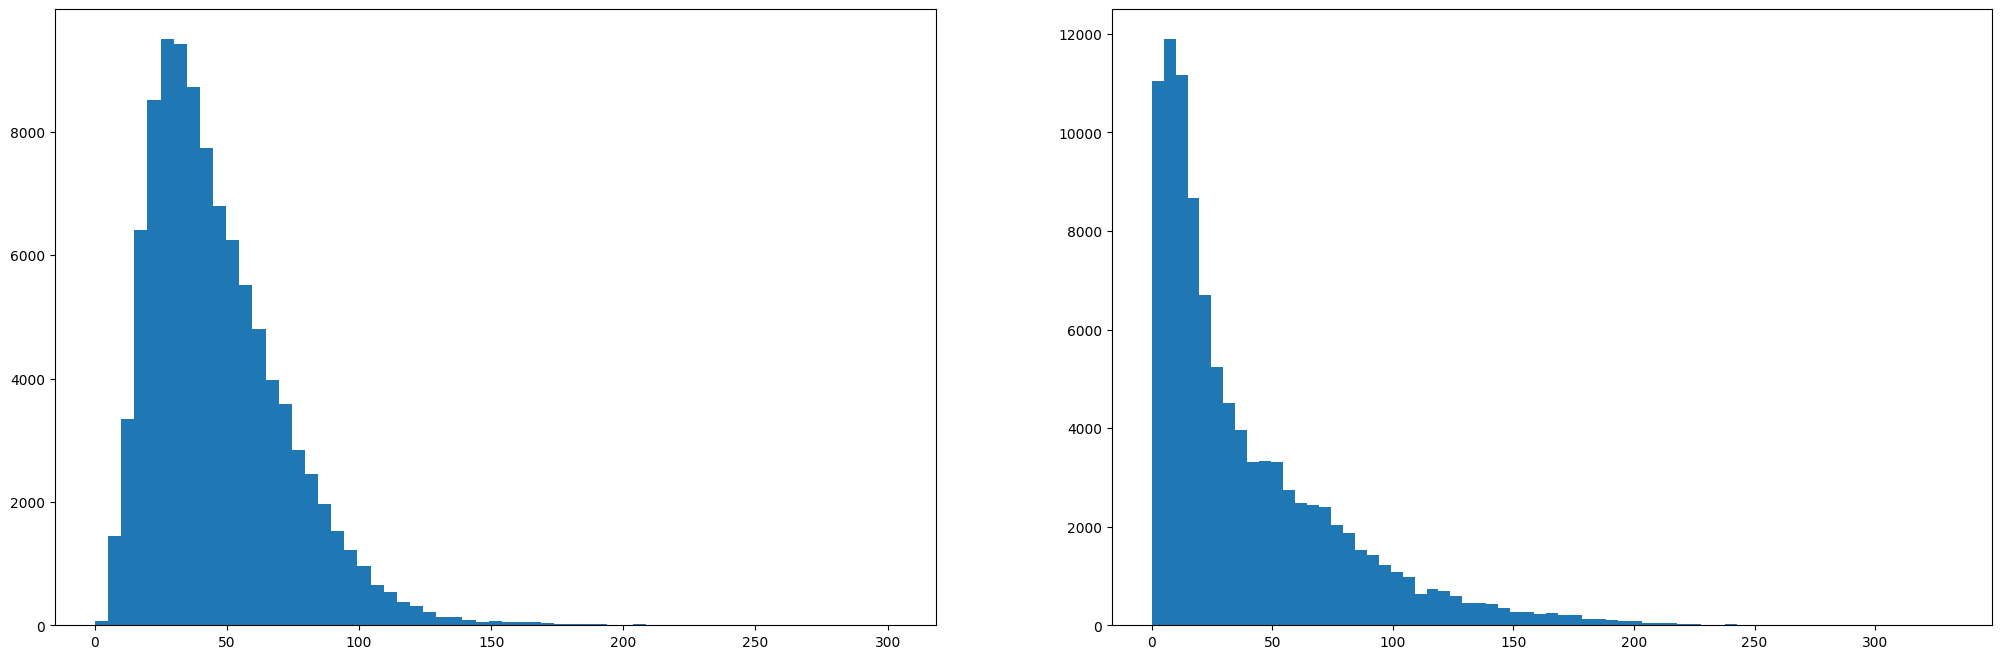

Locale: JP 
Number of products: 100000 
Product title lengths - Mean: 46.54 | Median 41.00 | Min: 0.00 | Max 303.00 
Product description lengths - Mean: 39.24 | Median 25.00 | Min: 0.00 | Max 332.00 

cxllll


100%|██████████| 100000/100000 [01:14<00:00, 1340.27it/s]


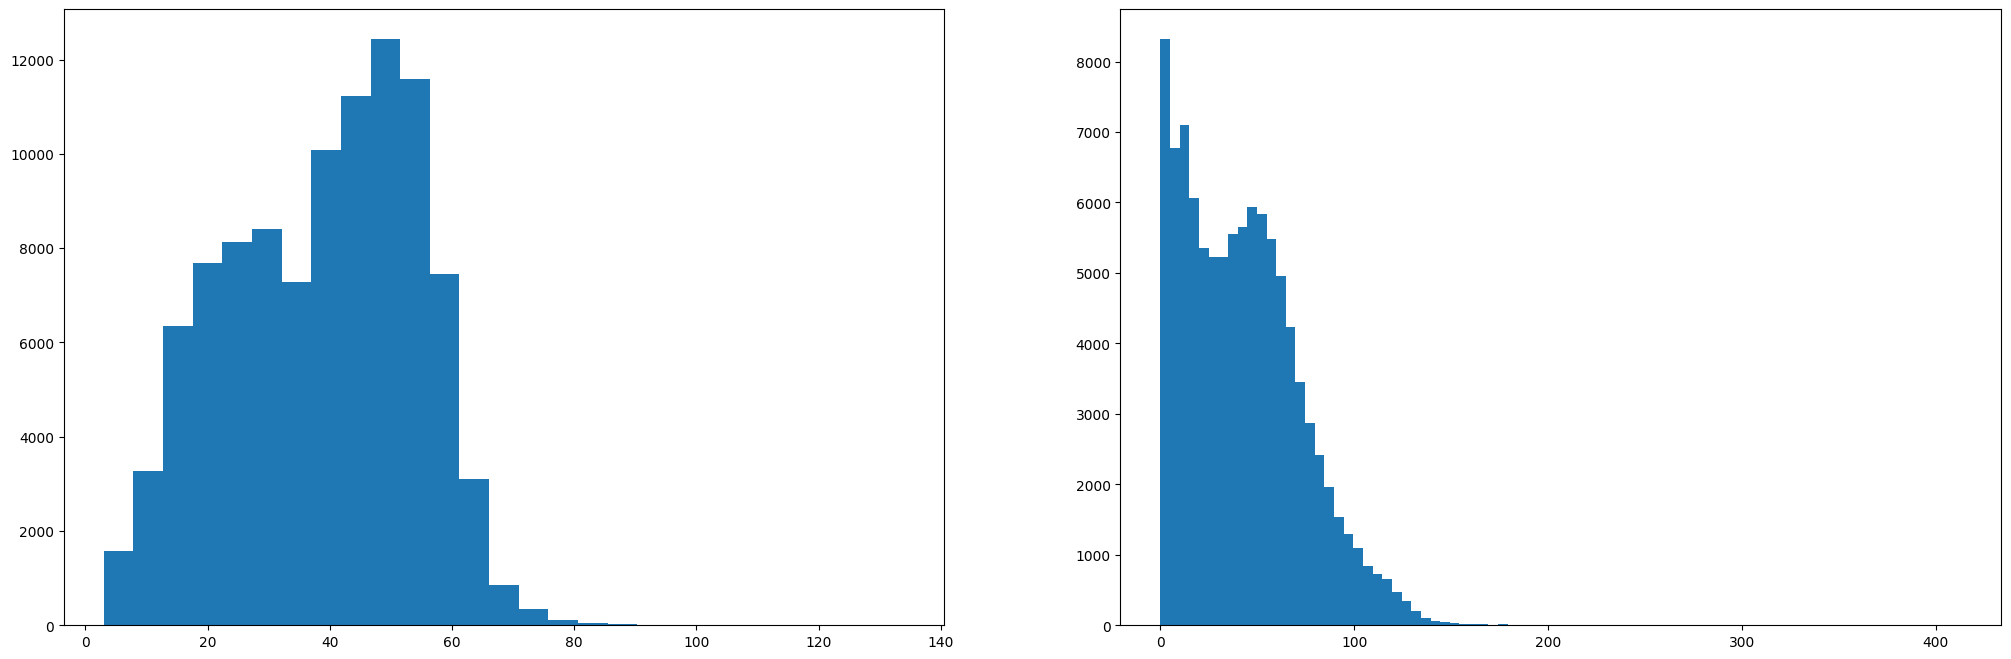

Locale: UK 
Number of products: 100000 
Product title lengths - Mean: 38.58 | Median 40.00 | Min: 3.00 | Max 134.00 
Product description lengths - Mean: 42.51 | Median 40.00 | Min: 0.00 | Max 413.00 

cxllll


100%|██████████| 42503/42503 [00:38<00:00, 1094.75it/s]


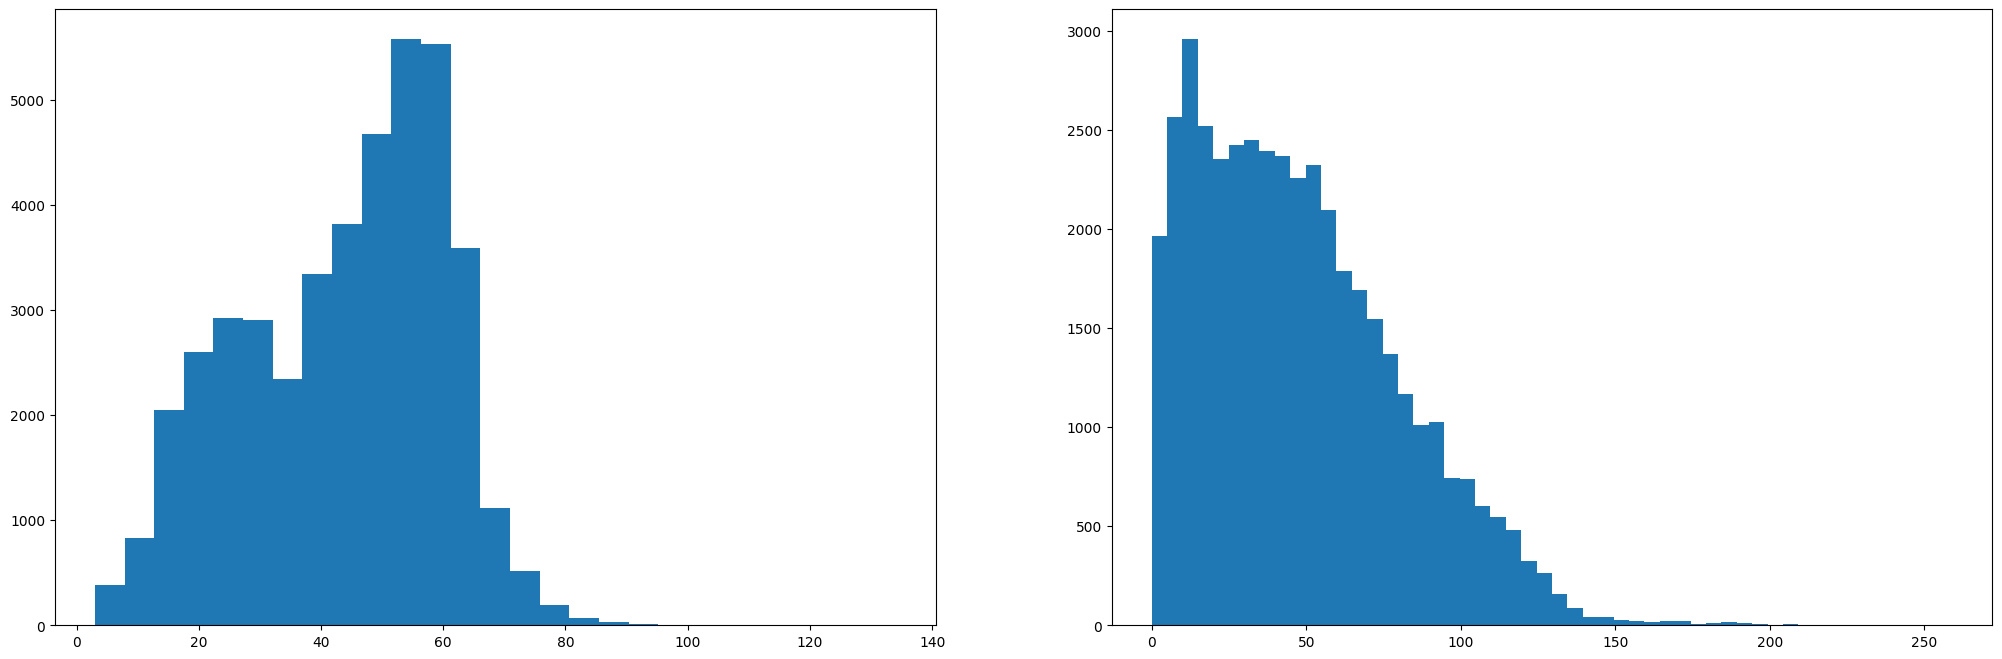

Locale: ES 
Number of products: 42503 
Product title lengths - Mean: 43.70 | Median 47.00 | Min: 3.00 | Max 134.00 
Product description lengths - Mean: 47.67 | Median 43.00 | Min: 0.00 | Max 259.00 

cxllll


100%|██████████| 44577/44577 [00:36<00:00, 1228.10it/s]


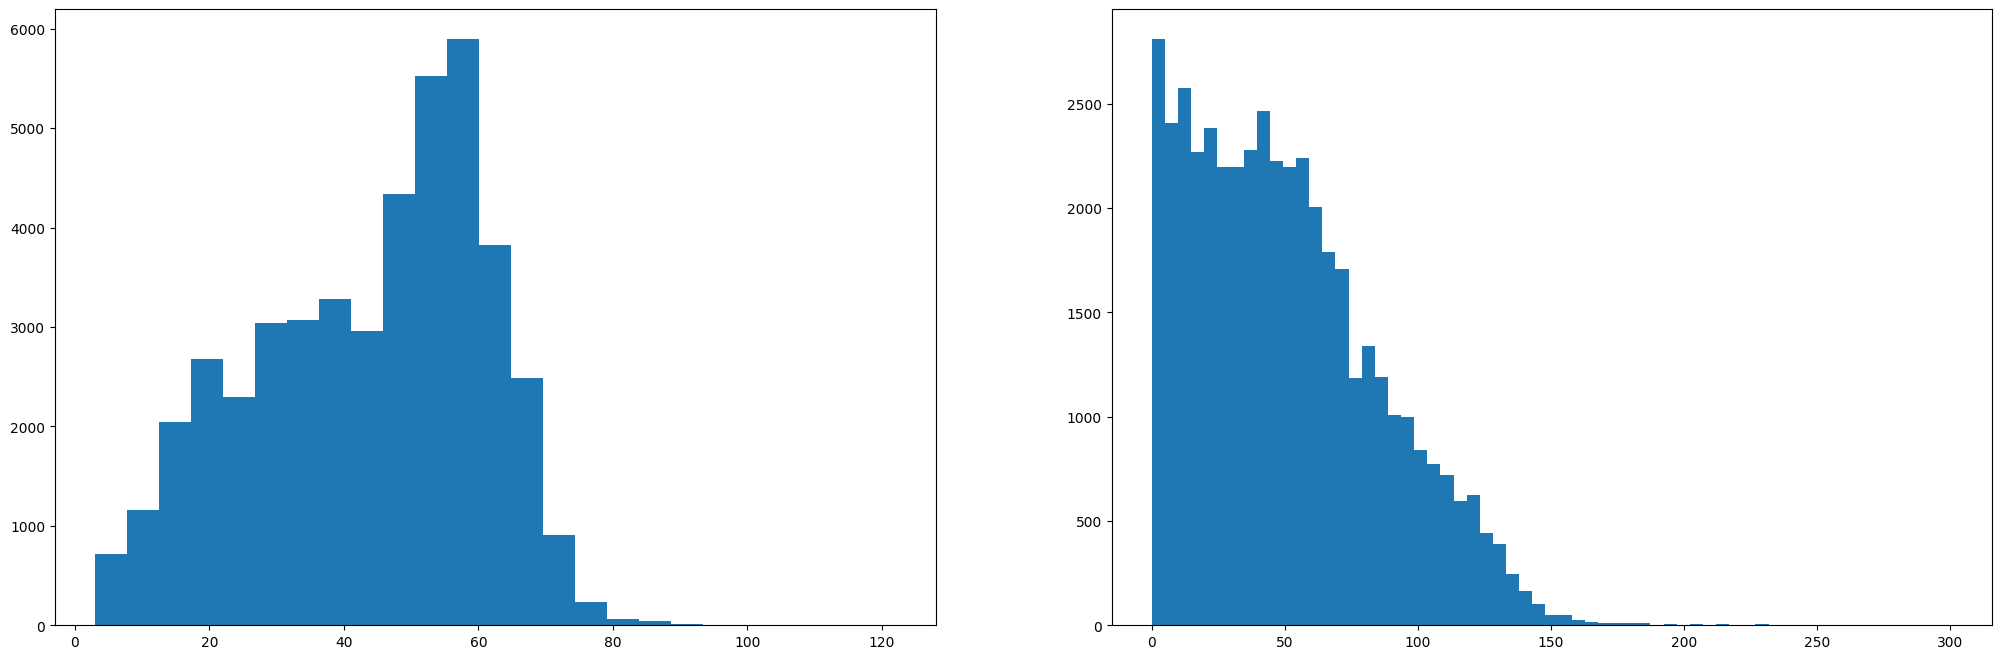

Locale: FR 
Number of products: 44577 
Product title lengths - Mean: 43.69 | Median 47.00 | Min: 3.00 | Max 122.00 
Product description lengths - Mean: 50.84 | Median 46.00 | Min: 0.00 | Max 301.00 

cxllll


100%|██████████| 50461/50461 [00:39<00:00, 1285.26it/s]


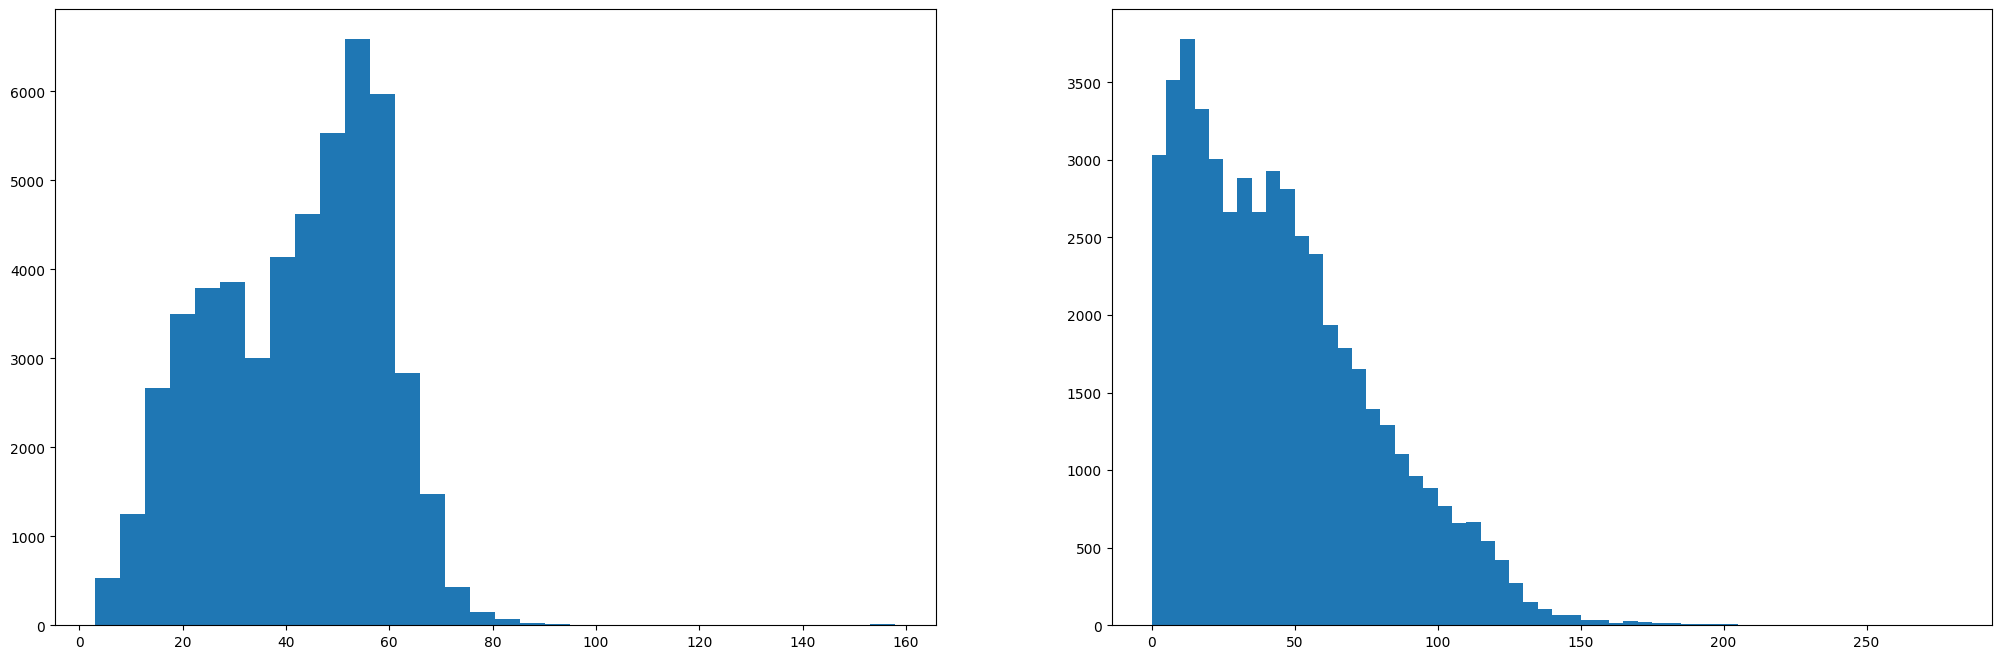

Locale: IT 
Number of products: 50461 
Product title lengths - Mean: 41.96 | Median 44.00 | Min: 3.00 | Max 158.00 
Product description lengths - Mean: 45.29 | Median 40.00 | Min: 0.00 | Max 280.00 

cxllll


In [14]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
products = read_product_data()
locale_names = products['locale'].unique()
# show_locale_product_info(locale_names[0], tokenizer)
for locale in locale_names:
    show_locale_product_info(locale, tokenizer)

about 7.6% products are included in multi locales, and about 5% products belong to two locales. 

## price, color and brand

In [8]:
products = read_product_data()
products.head(20)

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück
5,B09JNNBDH5,DE,"URBZUE Handwärmer, 10000mAh USB aufladbar und ...",20.99,URBZUE,Rosagold,13.5*9*5,Oro rosa,Aluminium,NaN,Einstellbarer Temperaturmodus: Aufladbare Hand...
6,B08R62WZ1Y,DE,"Kinderkopfhörer Bluetooth, Mädchen Katzenohr K...",24.97,JYPS,Lila,NaN,Kinderkopfhörer,NaN,NaN,🎁Drahtlose und kabelgebundene Kinderkopfhörer:...
7,B09WK4YNX8,DE,"8 Stück Herd Schalter Schutz, Küche Gasherd Kn...",12.49,FANSEZQ,Transparent,NaN,NaN,NaN,NaN,【BREITE ANWENDUNG】Diese Knopfschutzabdeckung i...
8,B07KTKFYYS,DE,AVANA Edelstahl Ausstechformen 12 Stück Ringe ...,13.99,AVANA,Silber,NaN,NaN,Edelstahl,NaN,100% ZUFRIEDENHEITSGARANTIE - Falls Sie nicht ...
9,B0B9MPKYJK,DE,Amstory Stirnlampe LED Wiederaufladbar Joggen ...,25.99,Amstory,Schwarz,2 Stücke,LMHL-0006BK,ABS,NaN,☀【1000 Lumen Superheller Kopflampe】 Der LED He...


In [66]:
# noise in price feature
((products['price'] == 40000000.07).sum() + (products['price'].isna()).sum() + (products['price'] == 0.0).sum()) / len(products)

0.04663916284185558

In [43]:
# num of brand
len(products['brand'].unique()), products['brand'].notna().sum(), products['brand'].notna().sum() / len(products['brand'].unique())

(178777, 1531691, 8.567606571315102)

In [44]:
# num of color
len(products['color'].unique()), products['color'].notna().sum(), products['color'].notna().sum() / len(products['color'].unique())

(219995, 1125432, 5.115716266278779)

In [45]:
# num of size
len(products['size'].unique()), products['size'].notna().sum(), products['size'].notna().sum() / len(products['size'].unique())

(231618, 917091, 3.9594979664792893)

In [48]:
# num of model
len(products['model'].unique()), products['model'].notna().sum(), products['model'].notna().sum() / len(products['model'].unique())

(524218, 761137, 1.4519474722348336)

In [49]:
# num of material
len(products['material'].unique()), products['material'].notna().sum(), products['material'].notna().sum() / len(products['material'].unique()) 

(49614, 834382, 16.817470875156207)

In [50]:
# num of author
len(products['author'].unique()), products['author'].notna().sum(), products['author'].notna().sum() / len(products['author'].unique()) 

(30917, 73509, 2.377623960927645)